<a href="https://colab.research.google.com/github/BuiloDiCarpaccio/covid_new_infected_predictor/blob/main/model-creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Epitech: New covid cases Prediction using Machine Learning
**Brought to you by: [Louis-Albert Bui And Antoine Ducrot](https://github.com/BuiloDiCarpaccio/covid_new_infected_predictor)** --- <i> Use it freely under [CC License](https://creativecommons.org/licenses/by/4.0/)</i> 


## **1. Introduction**
🦠 Last year, the world had been hit by a pandemic, that nobody was prepared for. The various measures taken by the differents governements have been ingenious, urgent and specific to each country, even if all was decided around a common base. One year after, it's time to check what was the best measures taken, and what we should do in the future, thanks to the data we got. In this case, we didn't considerate the vaccination, because it's obviously the best way to contain the pandemic, however, a vaccin is not always discover, so we need to know what is the best combinaison of measures in case of a possible new pandemic like the COVID-19.



## **2. ❓ How to use this notebook**

You don't need to know how to programme in Python (the programming language in which we wrote this notebook). The only thing you will need to do is to run the following cells –each small section of the code in the notebook– one at the time and in order. We have left comments in the code to help you understand the functions and steps being executed within each cell. Comments appear in green and are preceded by #s; these bits of text are ignored by the processor

*   To run a cell, hover over it and click on the ▶ button in the upper left corner. While it is running you the button will show a rotating circle.
*   If you want to interrupt its execution, you can click again on the button.
*   If the processing of a cell has an output, this will appear right after the cell when it finishes running.


❗ **Important** ❗ So that the execution doesn't take longer than necessary, 

---

check that in the tab 'Runtime' > 'Change Runtime Type' GPU is selected in the drop-down menu 'Hardware Accelerator'.


## **3. 🛠 Import our Toolkit**

Libraries are simply collections of functions which were previously written –by you or other programmers– and which can be added to the current notebook. The specific functions can then be used as necessary, just like any other functions written within the current notebook.


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

import pandas as pd
import sys
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     - 149.7MB 2.9MB/s
     |████████████████████████████████| 6.6MB 8.3MB/s 
     |████████████████████████████████| 225kB 40.8MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759561 sha256=9dc7aef3eca338f799cd1e772075d88133aec5e9010b360020b415d81698f933
  Stored in directory: /tmp/pip-ephem-wheel-cache-1a4mcp4

     |████████████████████████████████| 2.8MB 7.6MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702408 sha256=222a0461ee834013a2c5466b856e31759e0b5c7b315335c5b396b7914421d2c3
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.1.0
    Uninstalling pyproj-3.1.0:
      Successfully uninstalled pyproj-3.1.0


## **4. Uploading the Dataset**
We're going to use two datasets which contains all the information of the covid situation, and the country location(to draw some charts). The datasets are available from the following [link](https://epitechfr-my.sharepoint.com/:x:/g/personal/louis-albert_bui_epitech_eu/EeWS4MC_ev9EgCdhCw12TNgBwr6XeJPFD3dl8jphQNsNbQ?e=98phM2) and [link](https://epitechfr-my.sharepoint.com/:x:/g/personal/louis-albert_bui_epitech_eu/ESq1MhWkzAdLvEMvy2gSsnoBLif8Xr9aGXmZzYzMwfYOWA?e=VvQPiI)<br>
Please download the file from the link above and upload it to the notebook.

**How to upload the data**   
First, click on the small folder icon on the left:

![image.png](https://drive.google.com/uc?export=view&id=1siYEJjIPAauBn5xJI1ltLMNim3_YlPS9)


Then, click on the icon on the left which looks like a sheet of paper with an upwards pointing arrow on it. This will allow you to browser your computer and upload the dataset. Please upload *covid_data.csv* and *country_location.csv*. This will take a while
On the bottom of the screen, you'll see a small orange circle which indicates the upload progress   

  Once the dataset has been uploaded to your workspace, it'll appear in the files browser on the left:  

![image.png](https://drive.google.com/uc?export=view&id=1fUgjiMEEndNrn_tpOMjGY2yPh7PghOZ7)

  

In [ ]:
data = pd.read_csv("./covid-data.csv", sep=";")
countries_location = pd.read_csv('./country_location.csv')

## **5. EDA**

We begin with Exploratory Data Analysis (EDA). The goal of this procedure is to get a feel of the data: What features are present, how do they differ between each other, are there any interesting relationships between variables, is data missing?

The first step is to load the data into our notebook

### Dataset Inspection

Let's draw some chats to get an idea of the data we have.<br>
First, we will draw a chart that show the connections of the number of total cases and the limitation of internationals movments, then a chart that show the link betwen the number of total cases and movments measures restrictions inside the country.

In [ ]:
countries = data['COUNTRY'].unique()
total_case = []
lon = []
lat = []
international_mean = []
athome_mean = []


for country in countries:
  country_data = data.loc[(data['COUNTRY'] == country)]
  country_location = countries_location.loc[(countries_location['country'] == country)]
  if not country_location.empty:
    lon.append(country_location['longitude'])
    lat.append(country_location['latitude'])
    total_case.append(country_data['Cases'].max() / country_data['POPULATION'].mean())
    international_mean.append(country_data['INTERNATIONAL'].mean())
    athome_mean.append(country_data['ATHOME'].mean())



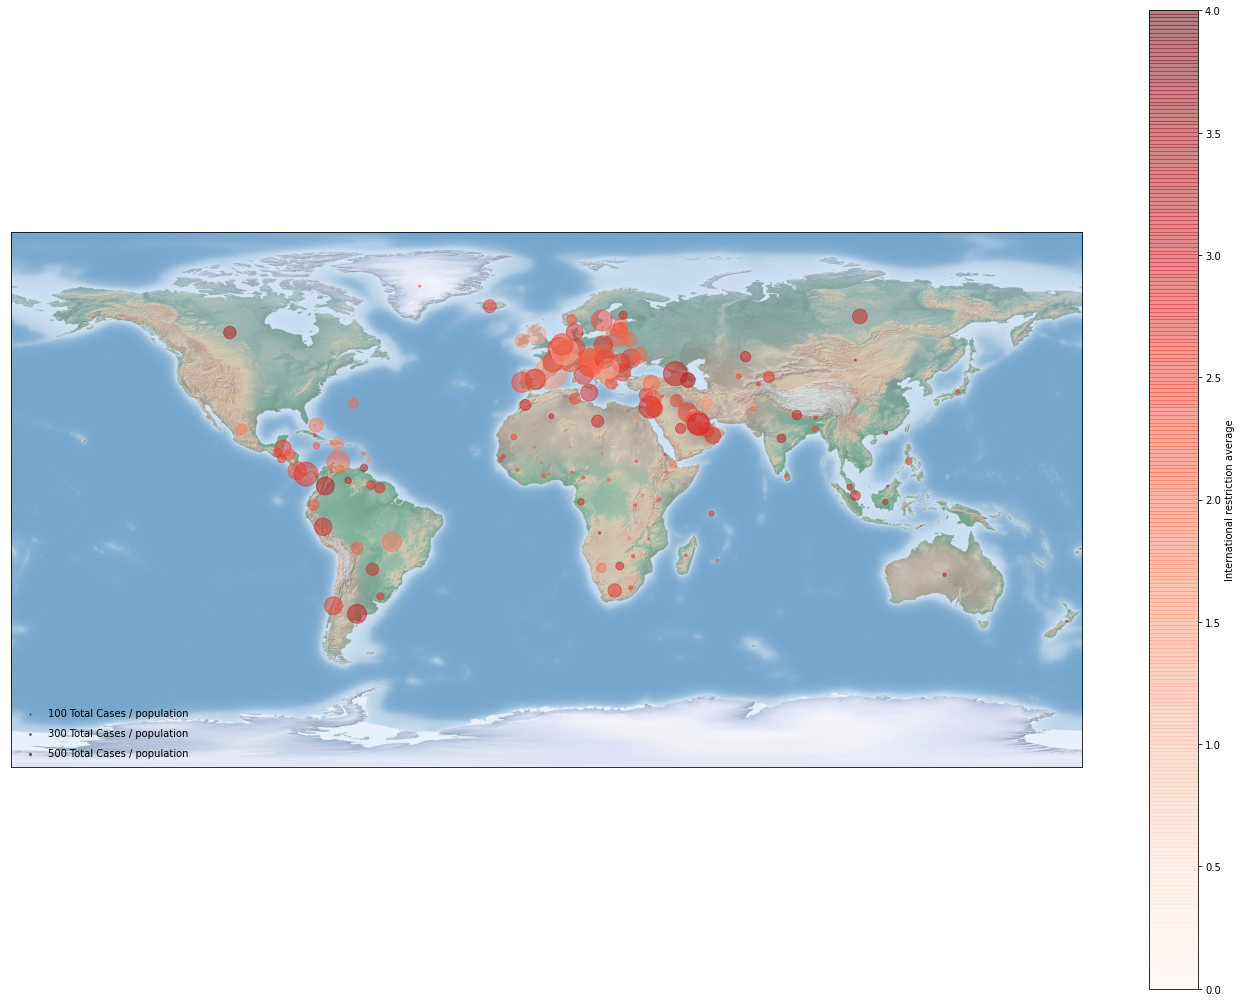

In [ ]:
fig = plt.figure(figsize=(24, 18), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

m.shadedrelief()

m.scatter(lon, lat, latlon=True,
          c=international_mean, s=np.multiply(total_case, 10000),
          cmap='Reds', alpha=0.5)

plt.colorbar(label='International restriction average')
plt.clim(0, 4)

for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=(a/100),
                label=str(a) + ' Total Cases / population')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

plt.savefig('./confirmed_case_map.png')

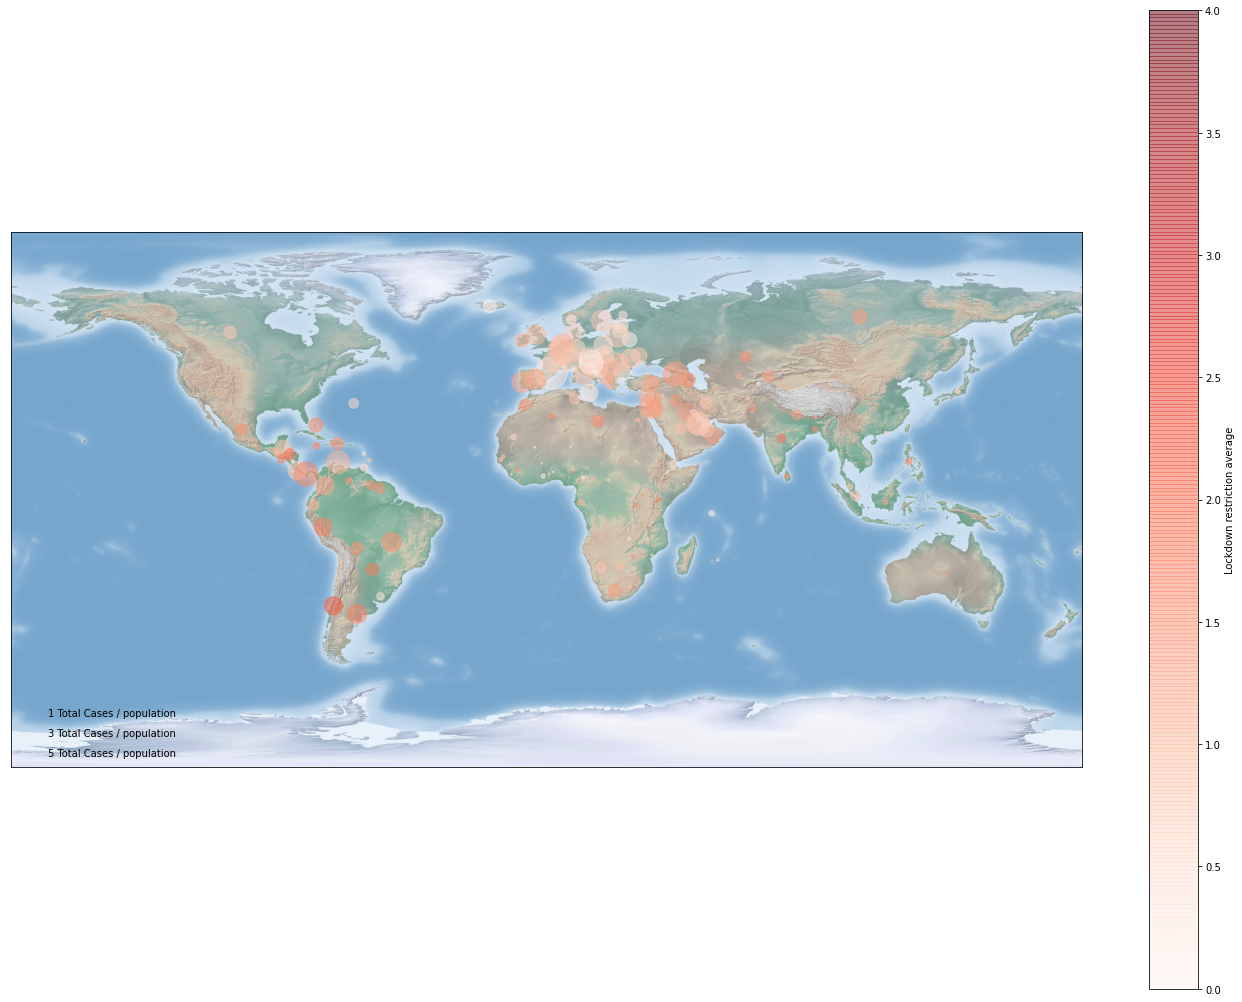

In [ ]:
fig = plt.figure(figsize=(24, 18), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

m.shadedrelief()

m.scatter(lon, lat, latlon=True,
          c=athome_mean, s=np.multiply(total_case, 10000),
          cmap='Reds', alpha=0.5)

plt.colorbar(label='Lockdown restriction average')
plt.clim(0, 4)

for a in [1, 3, 5]:
    plt.scatter([], [], c='k', alpha=0.8, s=(a / 10000),
                label=str(a) + ' Total Cases / population')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

plt.savefig('./lockdown_by_total_cases.png')

Now that we draw somes charts to understand the type of data we dealing with, let's drop the columns we don't need.

In [ ]:
data = data.drop(columns=[
                        'Unnamed: 0',
                        'OLD',
                        'YOUNG',
                        'POPULATION',
                        'PHYSICIANS',
                        'BEDS',
                        'TEMPERATURE',
                        'HUMIDITY',
                        'WIND',
                        'FLIGHTEVOLUTION',
                        '19FLIGHTS',
                        '20FLIGHTS',
                        '19MWHDemand',
                        '20MWHDemand',
                        'YOYELEC',
                        'DENSITY',
                        'URBAN',
                        'INFECTED',
                        'INFECTEDINCREASE',
                        'MORTALITY',
                        'FATALITYINCREASE',
                        'Cases',
                        'Deaths',
                        'DATE',
                        'REFF',
                        'New Deaths',
                        'CONTINENT'])

Then, we will drop rows that contains empty values.

In [ ]:
data = data.dropna()
data.isnull().sum()

SCHOOL            0
WORK              0
EVENTS            0
GATHERINGS        0
TRANSPORTATION    0
ATHOME            0
NATIONAL          0
INTERNATIONAL     0
INFORMATION       0
TESTING           0
TRACING           0
DAY               0
COUNTRY           0
New Cases         0
dtype: int64

We need to clean up the data, because some of the values in the new boxes are negative to make up for an error from a previous day. Our model won't be able to understand that it's a human error, so we'll delete these rows.
In addition, we will add a new column to our dataframe which will be the number of cases at Days + 7. It will be our target.

Since we have a quite huge amount of data, this part may take a few minutes.

In [ ]:
case_d7 = []
index_to_drop = []
for index, row in data.iterrows():
    if row['New Cases'] <= 0:
      index_to_drop.append(index)
      continue
    date = row['DAY']
    country = row['COUNTRY']
    if (pd.isnull(date)):
        index_to_drop.append(index)
        continue
    case_after_7d = data.loc[(data['DAY'] == date + 7) & (data['COUNTRY'] == country)]

    if case_after_7d.empty or case_after_7d['New Cases'].array[0] < 0:
        index_to_drop.append(index)
    else:
        case_d7.append(case_after_7d['New Cases'].array[0])
        
    if index % 1000 == 0:
        print('\r' + str(round(index / len(data.index) * 100)) + '%', end='')

data = data.drop(index_to_drop)
print('\r100%: Task done')

100%: Task done


Let's add our new target column in our dataframe

In [ ]:
data['NewCasesD7'] = case_d7

### Data Preprocessing


Let's introduce more meaningful labels 

In [ ]:
data.rename(columns={
    'SCHOOL':'School',
    'WORK':'Work',
    'EVENTS':'Events',
    'GATHERINGS':'Gatherings',
    'TRANSPORTATION': 'Transportation',
    'ATHOME': 'AtHome',
    'NATIONAL': 'National',
    'INTERNATIONAL': 'International',
    'INFORMATION': 'Information',
    'TESTING': 'Testing',
    'TRACING': 'Tracing',
    'New Cases': 'NewCases'
    }, inplace=True)

This is all looking very good so far. Let's rename some of the columns so it's 
later easier to understand what's going on


In [ ]:
features = ['School','Work','Events','Gatherings','Transportation','AtHome','National', 'International', 'Information', 'Testing', 'Tracing', 'NewCases']
target = ['NewCasesD7']
# let's split the data up into features and labels
X = data[features]
y = data[target]

Let's split data between 2 chunck of train and test dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

## **6. Training the Algorithm**

Here we are, we create our model and we fit it

In [ ]:
# define our model. This is a one-liner, thanks to the powerful machine learning library scikit-learn.
model = LinearRegression()
# fit the model to the training data 
model.fit(X_train,y_train)
# get predictions on the test data 
y_pred=model.predict(X_test)

## **7. Evaluating the Algorithm**

Print the test accuracy

In [ ]:
result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 88.60%


We reach our goal, all we have to do now is to check for all the different coefficients and compare them. The more a coefficient is low, the more the measure associated is effective to contain the outbreak

In [ ]:
coef = pd.DataFrame({'Feature': ['School','Work','Events','Gatherings','Transportation','AtHome','National', 'International', 'Information', 'Testing', 'Tracing', 'NewCases'], 'coef': model.coef_[0]})
print(coef)

           Feature        coef
0           School   68.734152
1             Work  -18.453568
2           Events  -32.385207
3       Gatherings   44.791612
4   Transportation   33.937289
5           AtHome -119.111958
6         National  140.493761
7    International  -52.886333
8      Information   72.883386
9          Testing  150.370253
10         Tracing -186.238136
11        NewCases    0.821523


Let's plot the regression line 

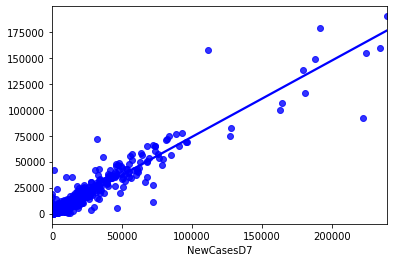

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

We will finish this notebook with the the coefficient of determination: 1 is perfect prediction

In [ ]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.89


## **8. Save the model**

In [ ]:
# Save the Model to file in the current working directory
pkl_file = "./model.pkl"

with open(pkl_file, 'wb') as file:
  pickle.dump(model, file)